In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz 
import pandas as pd

In [2]:
!pip install pydot

import pydot
from IPython.core.display import Image 

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
train = pd.read_csv("/content/drive/MyDrive/DSL session/[DSL] Decision Tree/diabetes.csv")

train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


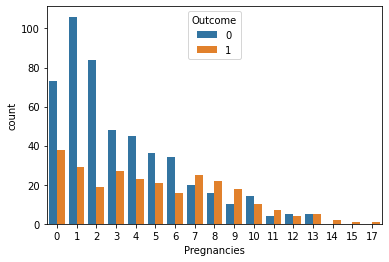

In [15]:
import seaborn as sns

sns.countplot(data=train, x="Pregnancies",hue="Outcome") 

In [19]:
feature_name =["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
x=train[feature_name]
label_name="Outcome"
y=train[label_name]
x.head()
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [62]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [44]:
dot_data = export_graphviz(model, out_file = None, # out_file: 파일로 내보내고자 하는 것이 아니라 직접 그리기 때문에 None
                                  feature_names = feature_name,
                                  class_names = ["None","Diabetes"],
                                  filled = True, # 색 넣어줌
                                  rounded = True, # 반올림
                                  special_characters = True) # 특수문자를 대비해서 넣어주는 옵션

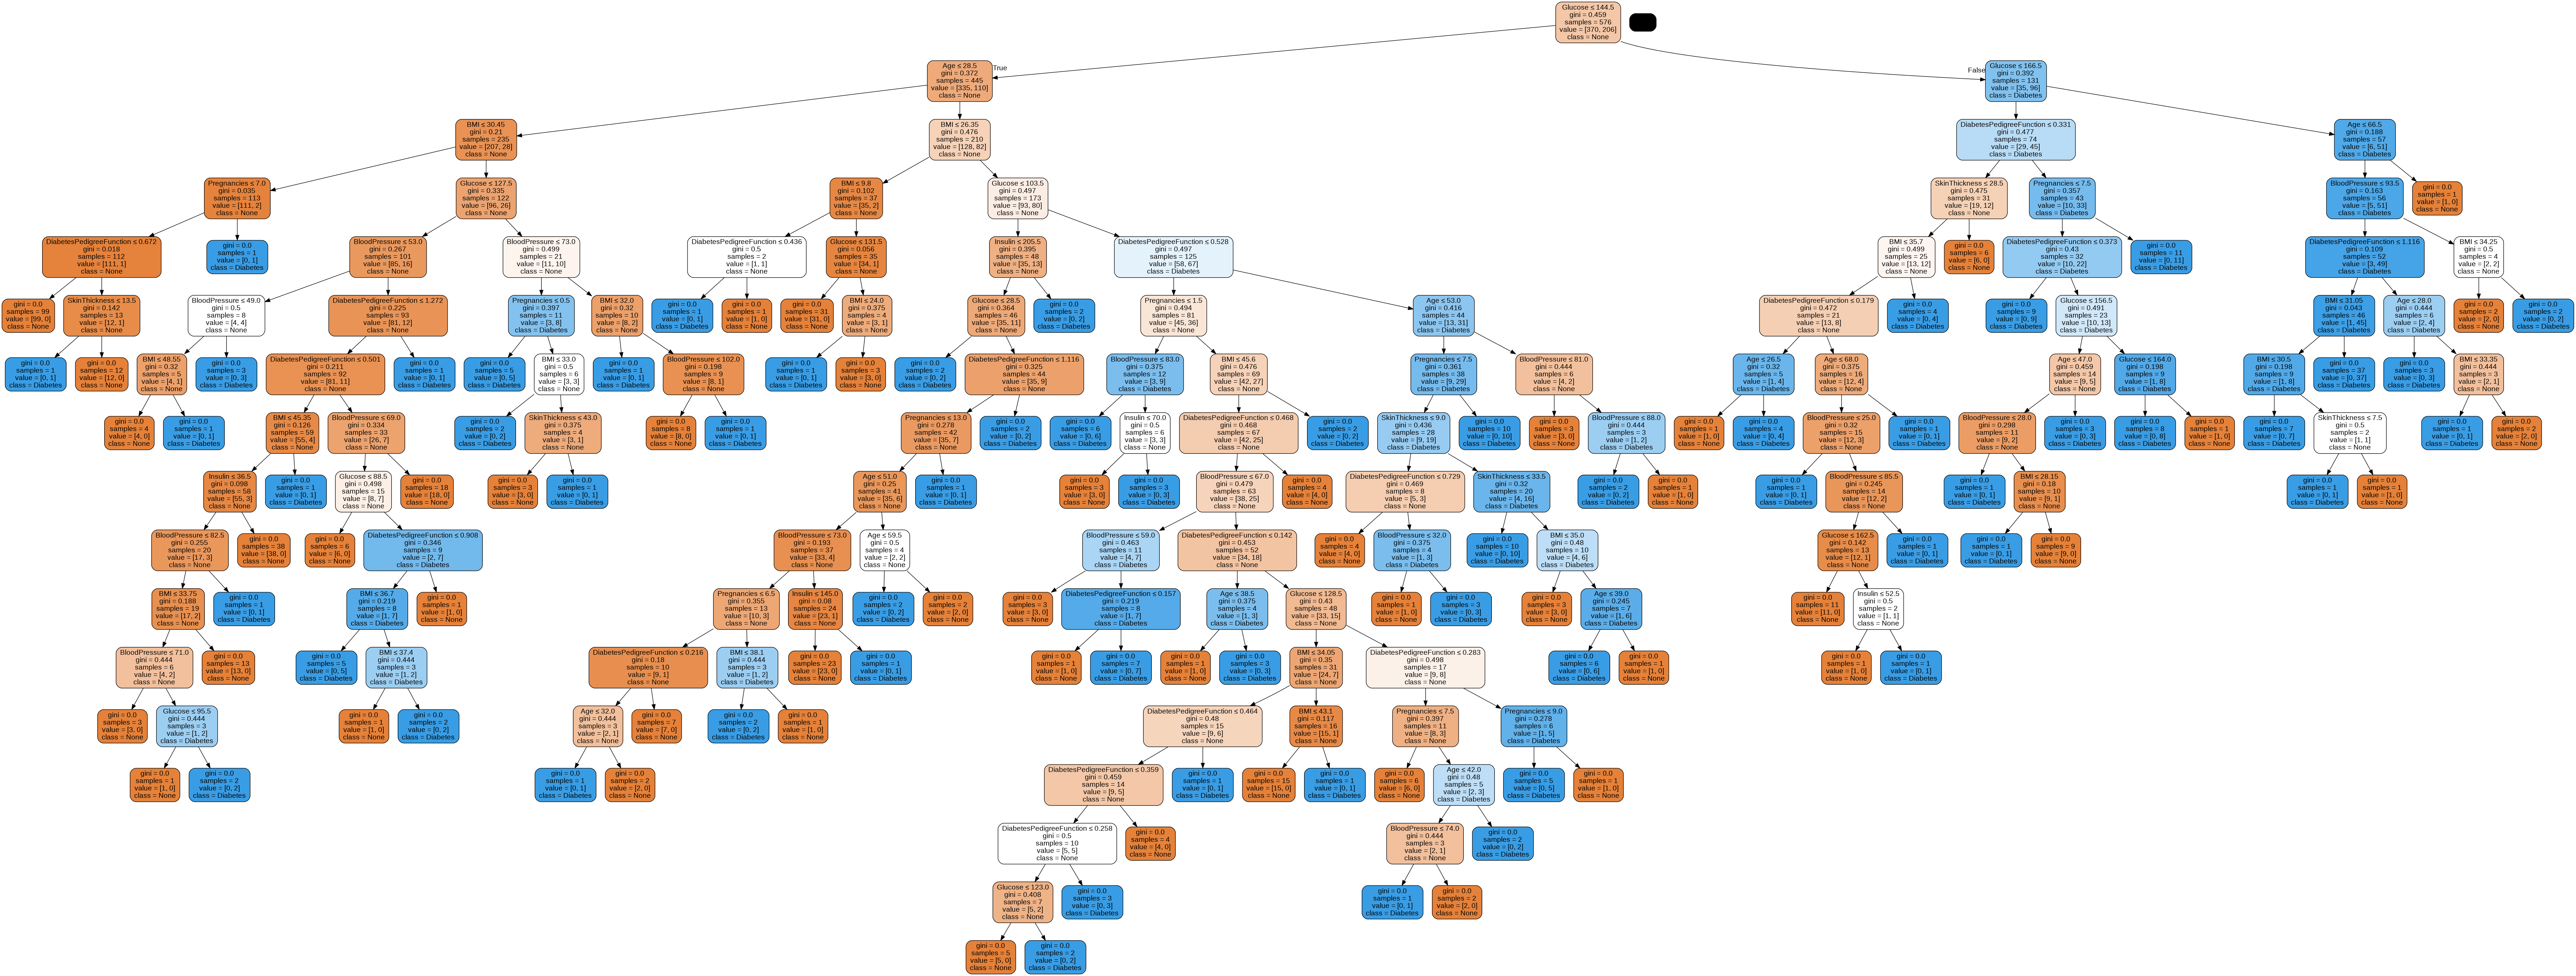

In [45]:
graph = pydot.graph_from_dot_data(dot_data)[0]
image = graph.create_png()
Image(image)
# 같은 색 계열이면 같은 집단으로 분류된 것

In [63]:
prediction = model.predict(x_test)

In [64]:
# Pruning 전 accuracy
from sklearn.metrics import accuracy_score
accuracy_score(prediction, y_test) * 100

71.875

In [46]:
# 함수로 만듦
def draw_decision_tree(clf, feature_names = None, class_names = None):
    dot_data = export_graphviz(clf, out_file = None, 
                                feature_names = feature_names,
                                class_names = class_names,
                                filled = True, 
                                rounded = True,
                                special_characters = True)
    graph = pydot.graph_from_dot_data(dot_data)[0]
    image = graph.create_png()
    return Image(image)

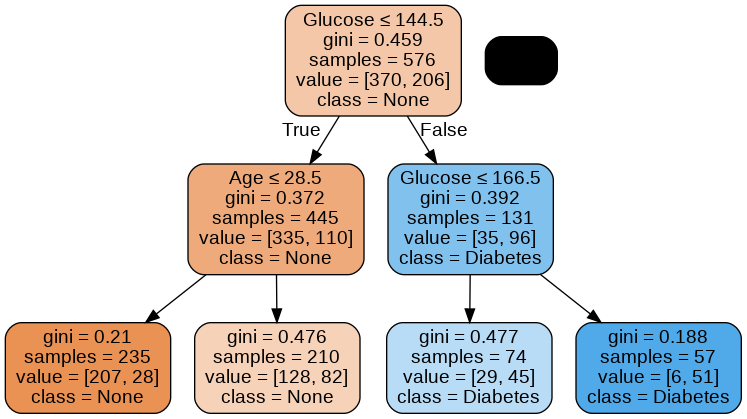

In [56]:
# 트리의 최대 depth를 결정
class_names = ["None","Diabetes"]

model = DecisionTreeClassifier(max_depth = 2)
tree = model.fit(x_train, y_train)
draw_decision_tree(tree, feature_name, class_names)

In [57]:
prediction = model.predict(x_test)

In [58]:
# max_depth를 이용해 Pruning 후 accuracy
from sklearn.metrics import accuracy_score
accuracy_score(prediction, y_test) * 100

75.0